In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [ ]:
run_id = 'BP_2Predictors_live_training_Horizon30'

In [ ]:
os.mkdir(run_id)

In [ ]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [2]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

#### Prophet and Neural prophet training set-up

In [17]:
training_data = DataLoader('BP', '2010-02-01', '2018-02-01')
training_data = training_data.get_adjclose()

#### Normal set-up

In [3]:
predict = DataLoader('BP', '2018-02-02', '2018-05-01')
predict = predict.get_adjclose()

In [4]:
predict_req, real = data_prep(predict, 20, 30) # dividing data into predictor input and real data

### Individual predictor forecasts

In [5]:
individual_predictors_forecasts = individual_predictors_pretrained_BP_30_3(predict_req, 30)

In [18]:
individual_predictors_forecasts = individual_predictors_template2(training_data, 30)

NameError: name 'individual_predictors_template2' is not defined

### System disagreement between individual predictor forecasts

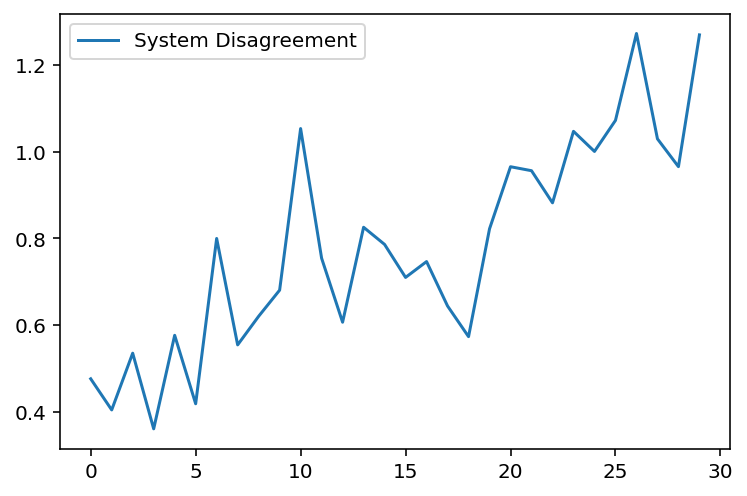

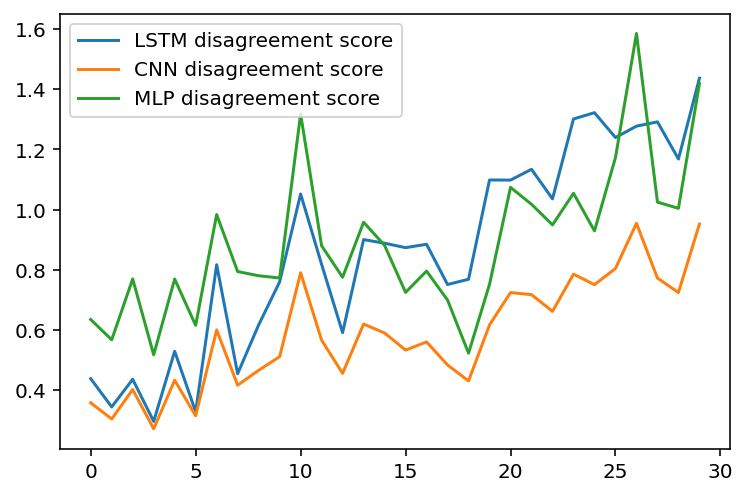

In [6]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [7]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

#### Only using correcting consensus algorithm:

In [8]:
#consensus_forecasts = consensus_optimal(individual_predictors_forecasts, real)

In [9]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [10]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Correcting,Correcting Memory,Real Value,LSTM,CNN,MLP,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score
Date,,,,,,,,,,,,,,,
2018-03-05,31.957194,31.957194,31.957194,31.957194,32.532699,31.957194,31.957194,31.924553,31.519371,31.760506,32.591705,0.476593,0.437823,0.357445,0.634511
2018-03-06,31.980286,31.898444,31.939365,31.757072,31.929811,31.948444,31.964365,32.242489,31.636442,31.757072,32.547344,0.404845,0.343844,0.303634,0.567058
2018-03-07,31.855494,31.924060,31.840338,32.624828,32.032860,32.114873,31.930719,32.046844,31.419725,31.521929,32.624828,0.535601,0.435769,0.401701,0.769334
2018-03-08,31.908937,31.909739,31.901593,31.687441,31.828036,32.103668,32.015331,32.169121,31.613255,31.687441,32.426117,0.361272,0.295683,0.270954,0.517179
2018-03-09,31.709794,31.791685,31.720467,32.478863,31.934891,31.966201,31.843987,32.332169,31.181055,31.469465,32.478863,0.576803,0.528739,0.432603,0.769068
2018-03-12,31.776096,31.899884,31.800691,32.391087,31.835386,32.402068,31.993611,32.487061,31.448248,31.488953,32.391087,0.419039,0.327848,0.314280,0.614991
2018-03-13,31.479819,31.695607,31.555455,32.463337,31.922374,32.180351,31.761482,32.242489,30.663185,31.312935,32.463337,0.800067,0.816634,0.600051,0.983518
2018-03-14,31.681912,31.839037,31.747926,32.475788,31.734717,32.454535,32.028333,31.688131,31.227610,31.342339,32.475788,0.554746,0.454302,0.416059,0.793876
2018-03-15,31.532103,31.446168,31.587659,31.368473,31.569082,31.538207,31.839027,31.818569,30.915678,31.368473,32.312157,0.620657,0.616425,0.465493,0.780054


In [ ]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [11]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,System Disagreement
Date,,,,,,,,,,,,,,
2018-03-05,0.405182,0.164047,0.667152,0.032641,0.032641,0.032641,0.032641,0.608146,0.032641,0.032641,0.437823,0.357445,0.634511,0.476593
2018-03-06,0.606047,0.485416,0.304855,0.262203,0.344045,0.303124,0.485416,0.312678,0.294045,0.278124,0.343844,0.303634,0.567058,0.404845
2018-03-07,0.627119,0.524916,0.577984,0.191350,0.122785,0.206506,0.577984,0.013985,0.068028,0.116126,0.435769,0.401701,0.769334,0.535601
2018-03-08,0.555866,0.481680,0.256996,0.260183,0.259382,0.267528,0.481680,0.341085,0.065453,0.153790,0.295683,0.270954,0.517179,0.361272
2018-03-09,1.151114,0.862703,0.146694,0.622374,0.540483,0.611701,0.146694,0.397277,0.365968,0.488182,0.528739,0.432603,0.769068,0.576803
2018-03-12,1.038813,0.998108,0.095974,0.710965,0.587176,0.686369,0.095974,0.651674,0.084992,0.493450,0.327848,0.314280,0.614991,0.419039
2018-03-13,1.579304,0.929554,0.220848,0.762670,0.546882,0.687034,0.220848,0.320115,0.062138,0.481007,0.816634,0.600051,0.983518,0.800067
2018-03-14,0.460522,0.345793,0.787657,0.006219,0.150905,0.059794,0.787657,0.046586,0.766404,0.340201,0.454302,0.416059,0.793876,0.554746
2018-03-15,0.902891,0.450096,0.493587,0.286467,0.372402,0.230910,0.450096,0.249487,0.280362,0.020458,0.616425,0.465493,0.780054,0.620657


In [ ]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,MLP absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,System Disagreement
LSTM absolute error,1.000000,0.986546,0.942621,0.995500,0.993947,0.993395,0.949262,0.973378,-0.006108,0.984486,0.884761,0.825593,0.638411,0.825593
CNN absolute error,0.986546,1.000000,0.945150,0.994221,0.994255,0.994893,0.949393,0.974997,-0.038785,0.988962,0.813069,0.780435,0.634510,0.780435
MLP absolute error,0.942621,0.945150,1.000000,0.946483,0.958374,0.948551,0.986501,0.952559,-0.009331,0.954618,0.797568,0.754487,0.598060,0.754487
Average absolute error,0.995500,0.994221,0.946483,1.000000,0.998479,0.999729,0.951457,0.983213,-0.016471,0.992274,0.836733,0.775681,0.592545,0.775681
NoMemory absolute error,0.993947,0.994255,0.958374,0.998479,1.000000,0.998633,0.963510,0.983464,-0.023080,0.992212,0.835378,0.778796,0.601202,0.778796
Memory absolute error,0.993395,0.994893,0.948551,0.999729,0.998633,1.000000,0.953349,0.983806,-0.020300,0.993210,0.825919,0.765351,0.584216,0.765351
Focus absolute error,0.949262,0.949393,0.986501,0.951457,0.963510,0.953349,1.000000,0.952652,0.009238,0.958063,0.807859,0.761552,0.599902,0.761552
Anchor absolute error,0.973378,0.974997,0.952559,0.983213,0.983464,0.983806,0.952652,1.000000,0.033076,0.986213,0.793797,0.722248,0.532154,0.722248
Correcting absolute error,-0.006108,-0.038785,-0.009331,-0.016471,-0.023080,-0.020300,0.009238,0.033076,1.000000,0.033005,0.038367,-0.016890,-0.088239,-0.016890
Correcting Memory absolute error,0.984486,0.988962,0.954618,0.992274,0.992212,0.993210,0.958063,0.986213,0.033005,1.000000,0.810961,0.753120,0.577222,0.753120


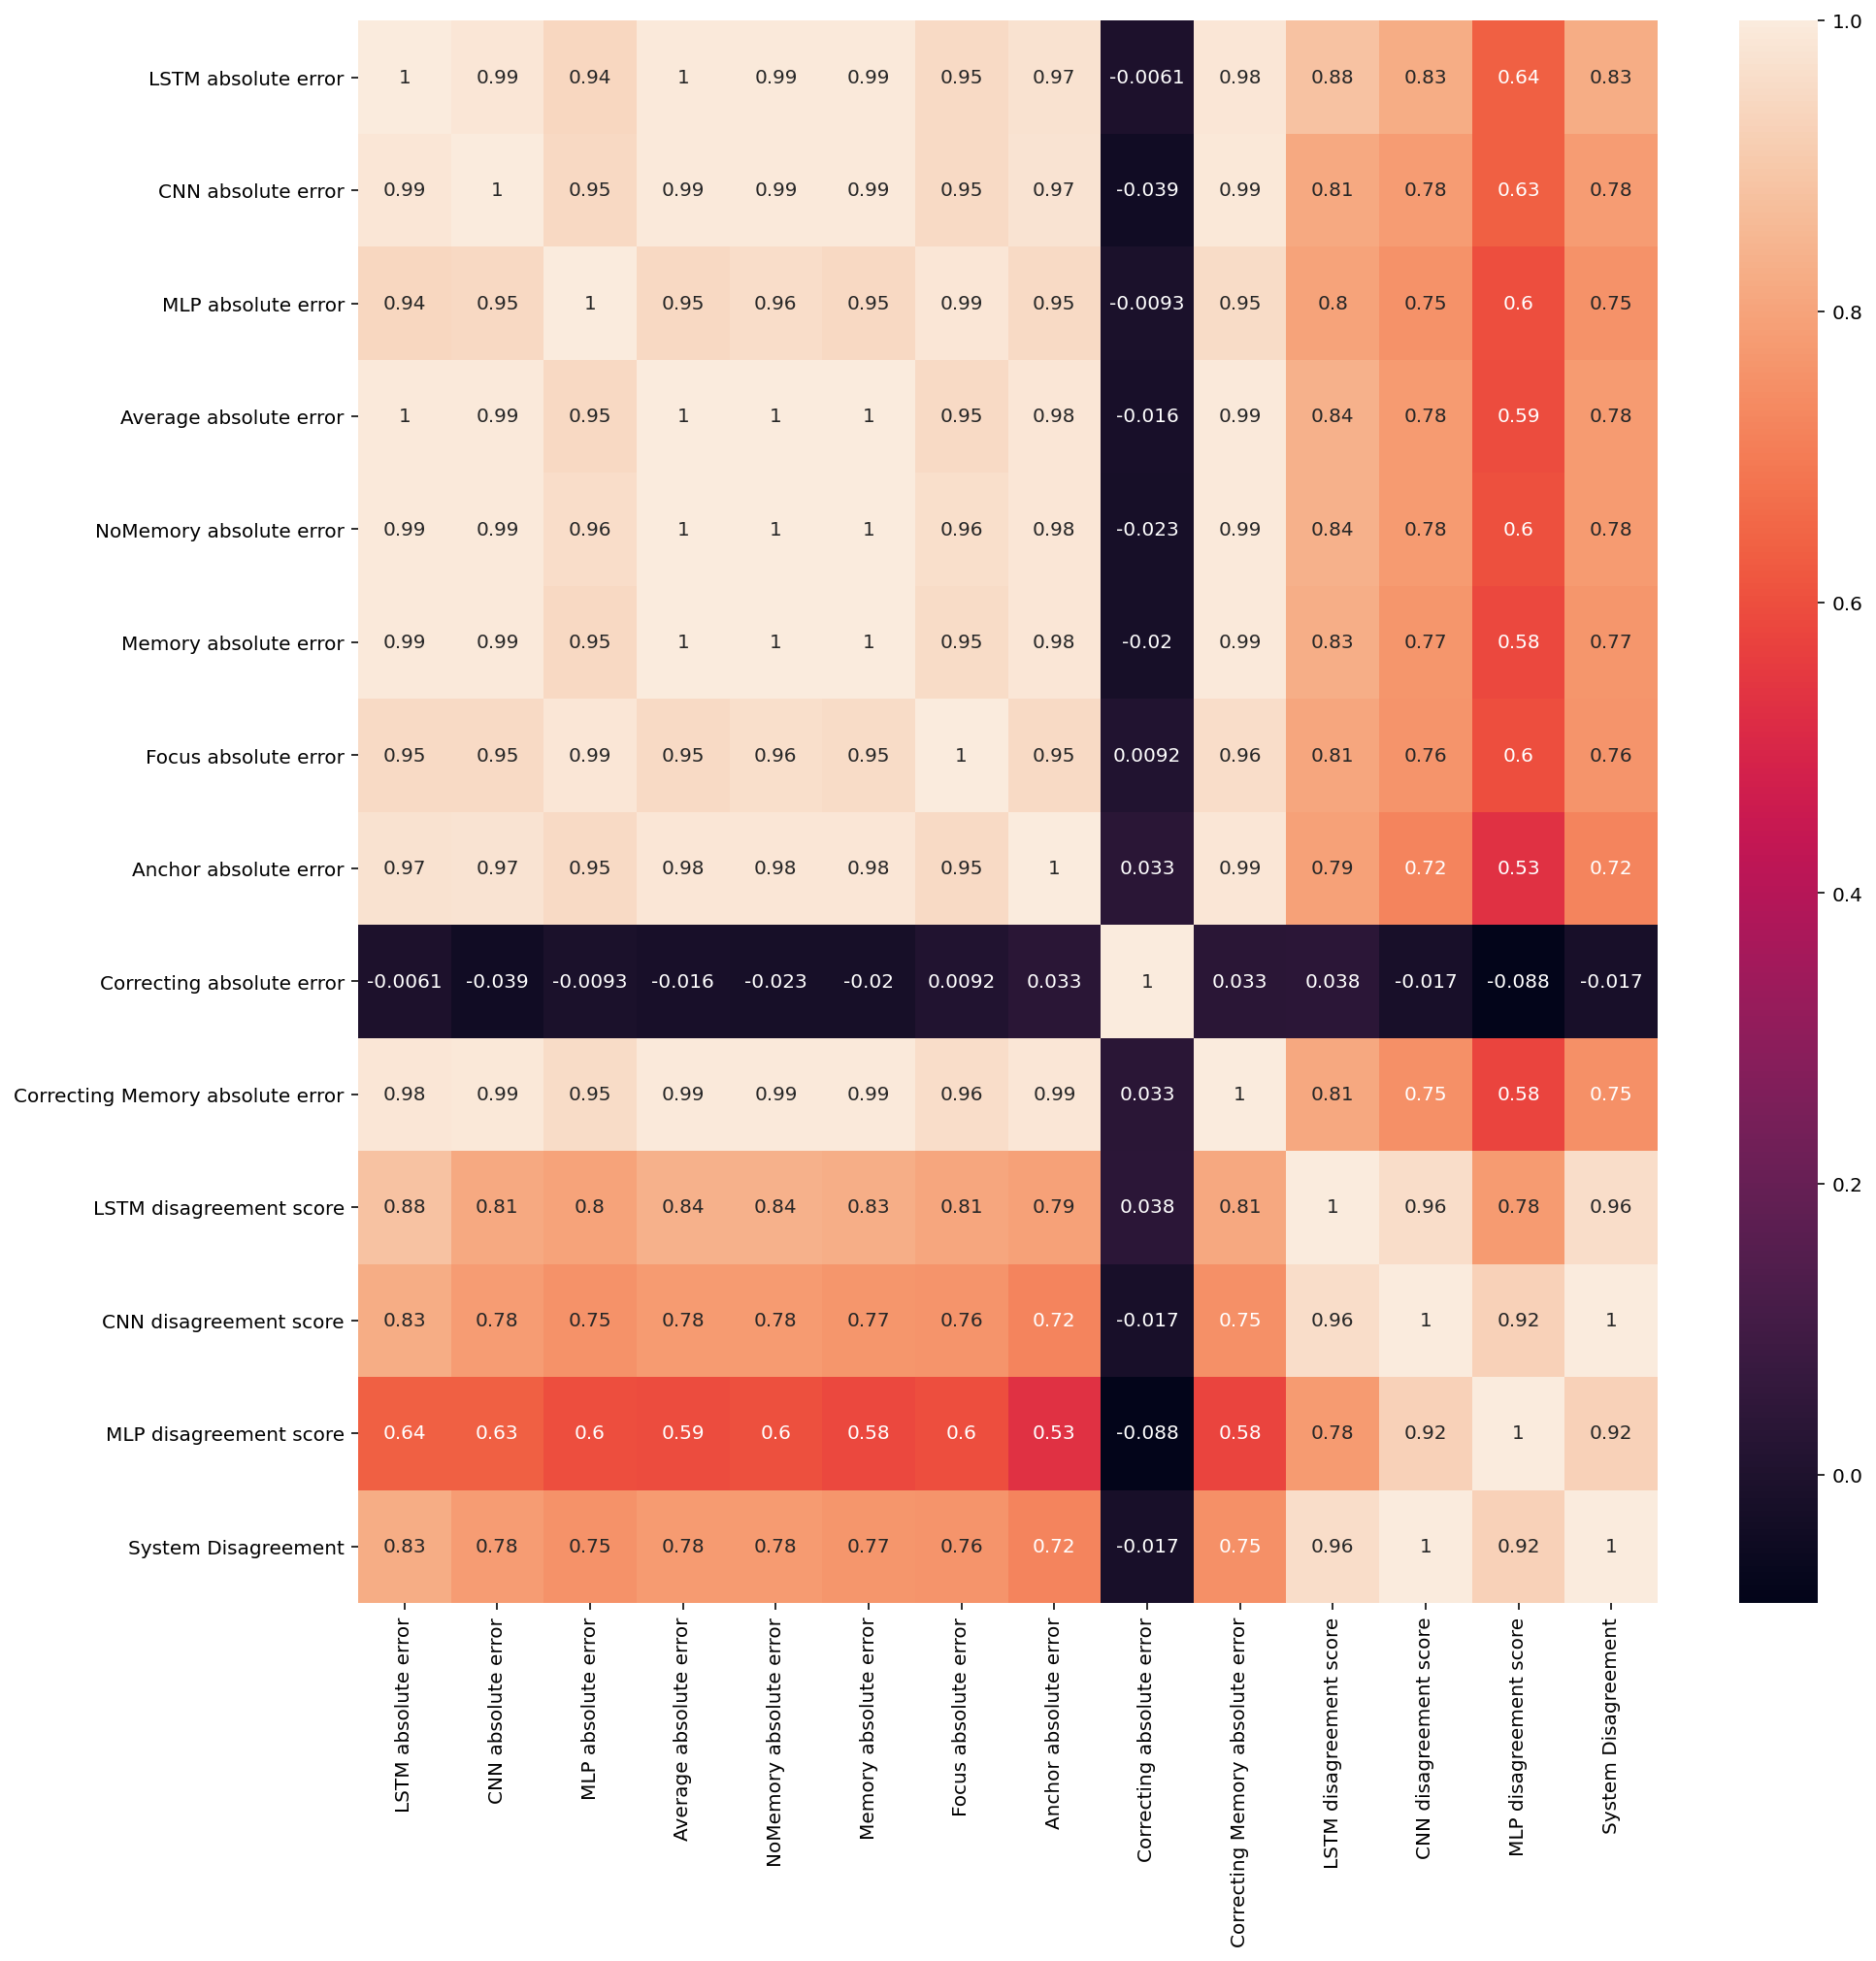

In [12]:
correlation_ = correlation(prediction_error, True)
correlation_

In [ ]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MSE,  MSE log and MAE scores

,Algorithms,MSE
0,Average,6.247779
1,NoMemory,5.800869
2,Memory,5.749588
3,Focus,3.283007
4,Anchor,3.602895
5,Correcting,0.281694
6,Correcting Memory,2.967001
7,LSTM,11.273420
8,CNN,5.967228
9,MLP,3.259404


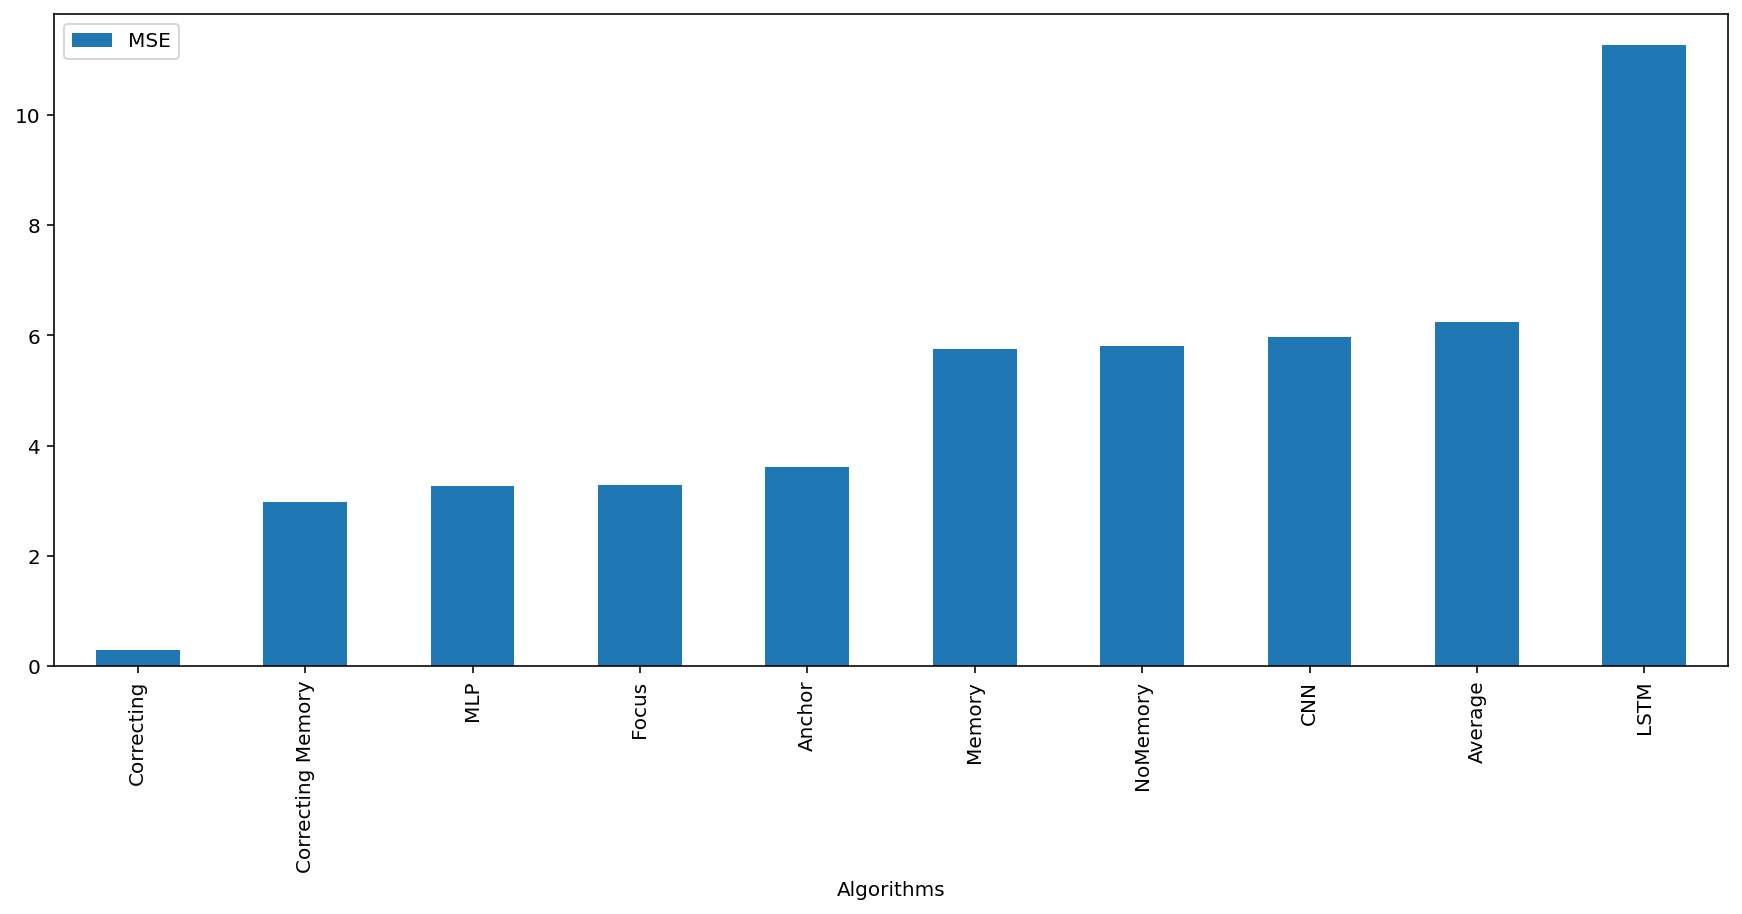

In [13]:
mse = mse_score(all_forecasts, True)
mse

In [ ]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.005616
1,NoMemory,0.005191
2,Memory,0.005143
3,Focus,0.002855
4,Anchor,0.003152
5,Correcting,0.000250
6,Correcting Memory,0.002572
7,LSTM,0.010552
8,CNN,0.005346
9,MLP,0.002833


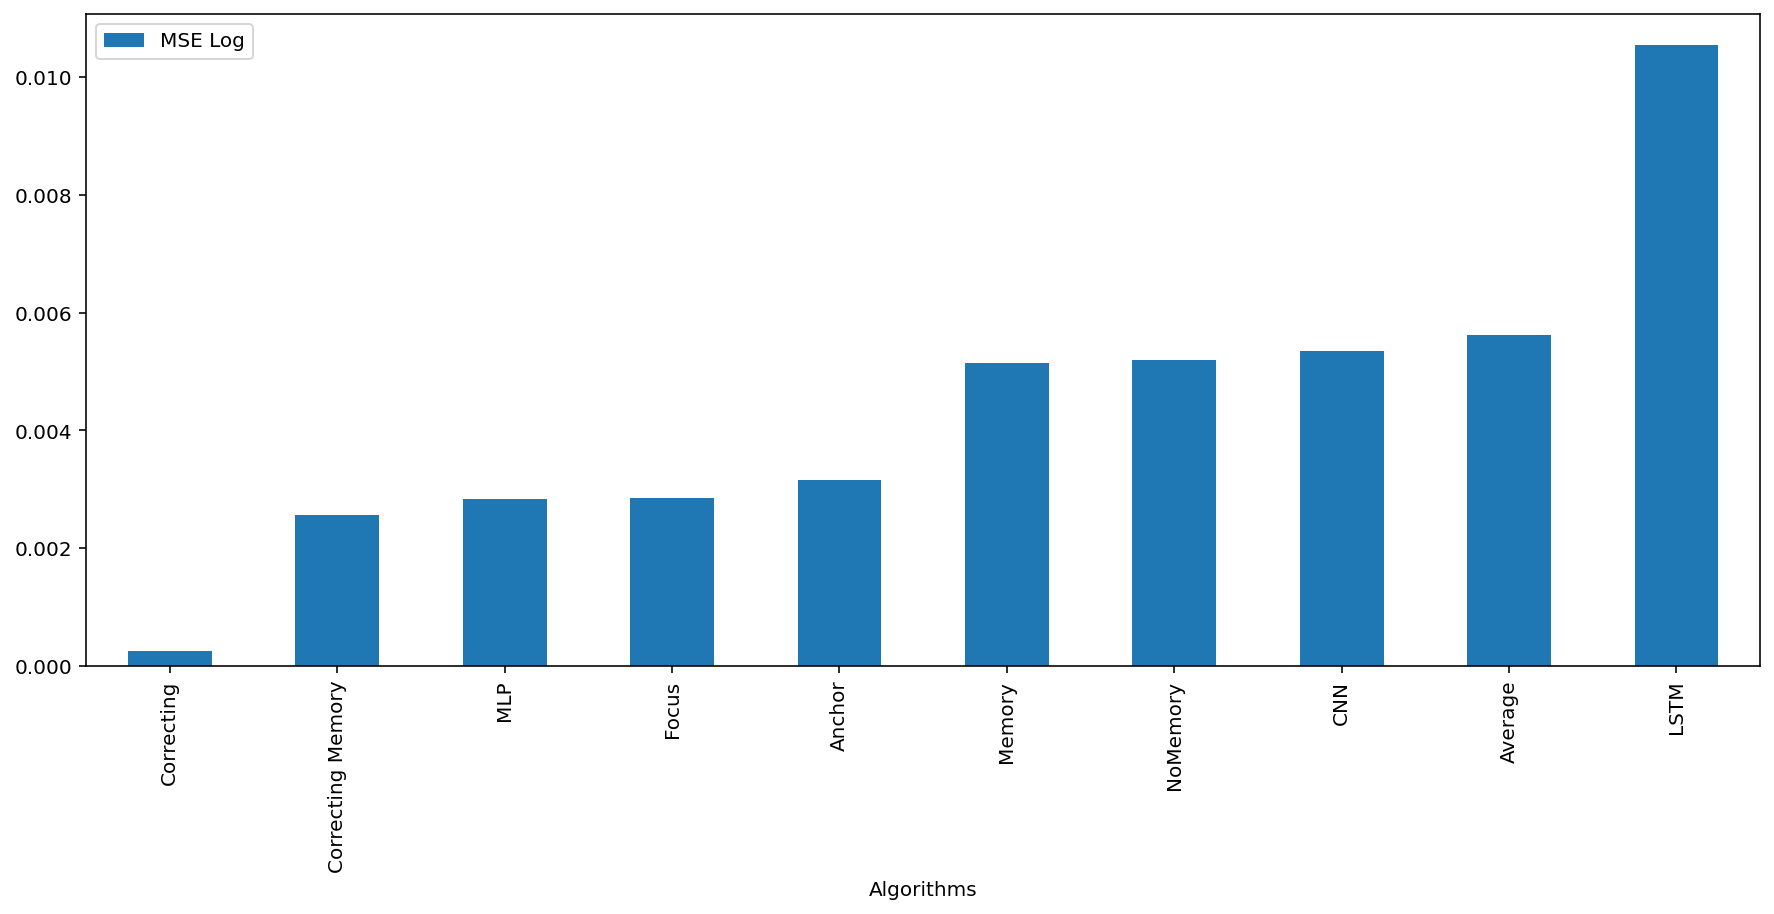

In [14]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [ ]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,1.888242
1,NoMemory,1.803811
2,Memory,1.799567
3,Focus,1.378042
4,Anchor,1.464098
5,Correcting,0.417737
6,Correcting Memory,1.295489
7,LSTM,2.750965
8,CNN,1.912448
9,MLP,1.352358


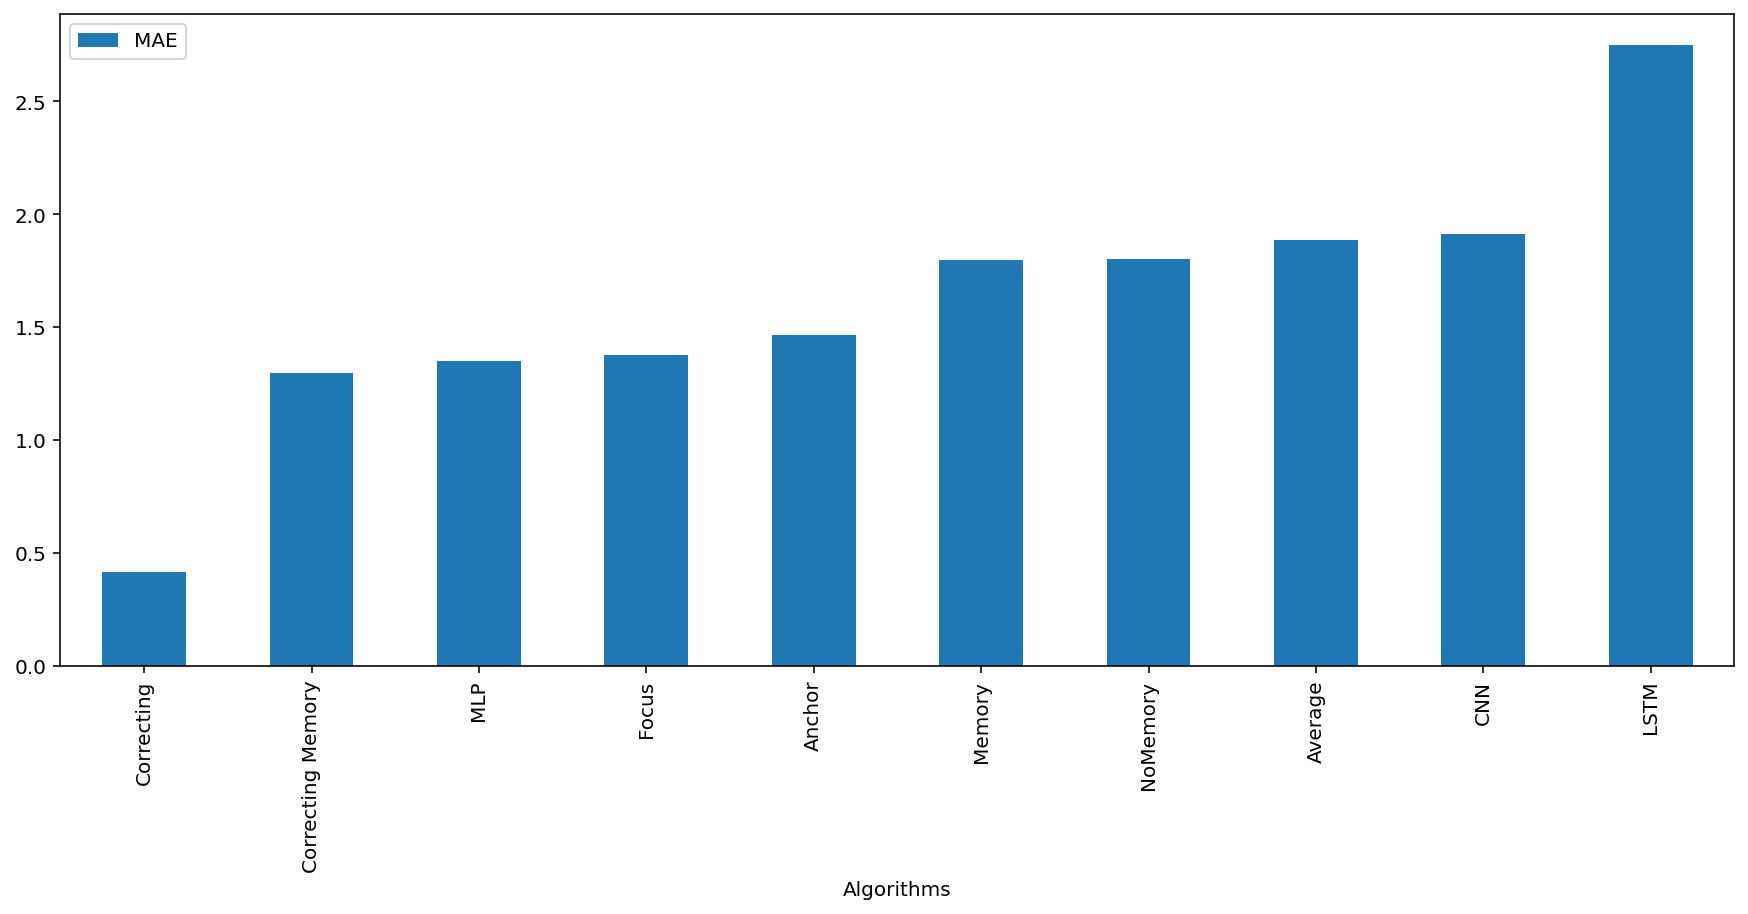

In [15]:
mae = mae_score(all_forecasts, True)
mae

In [ ]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

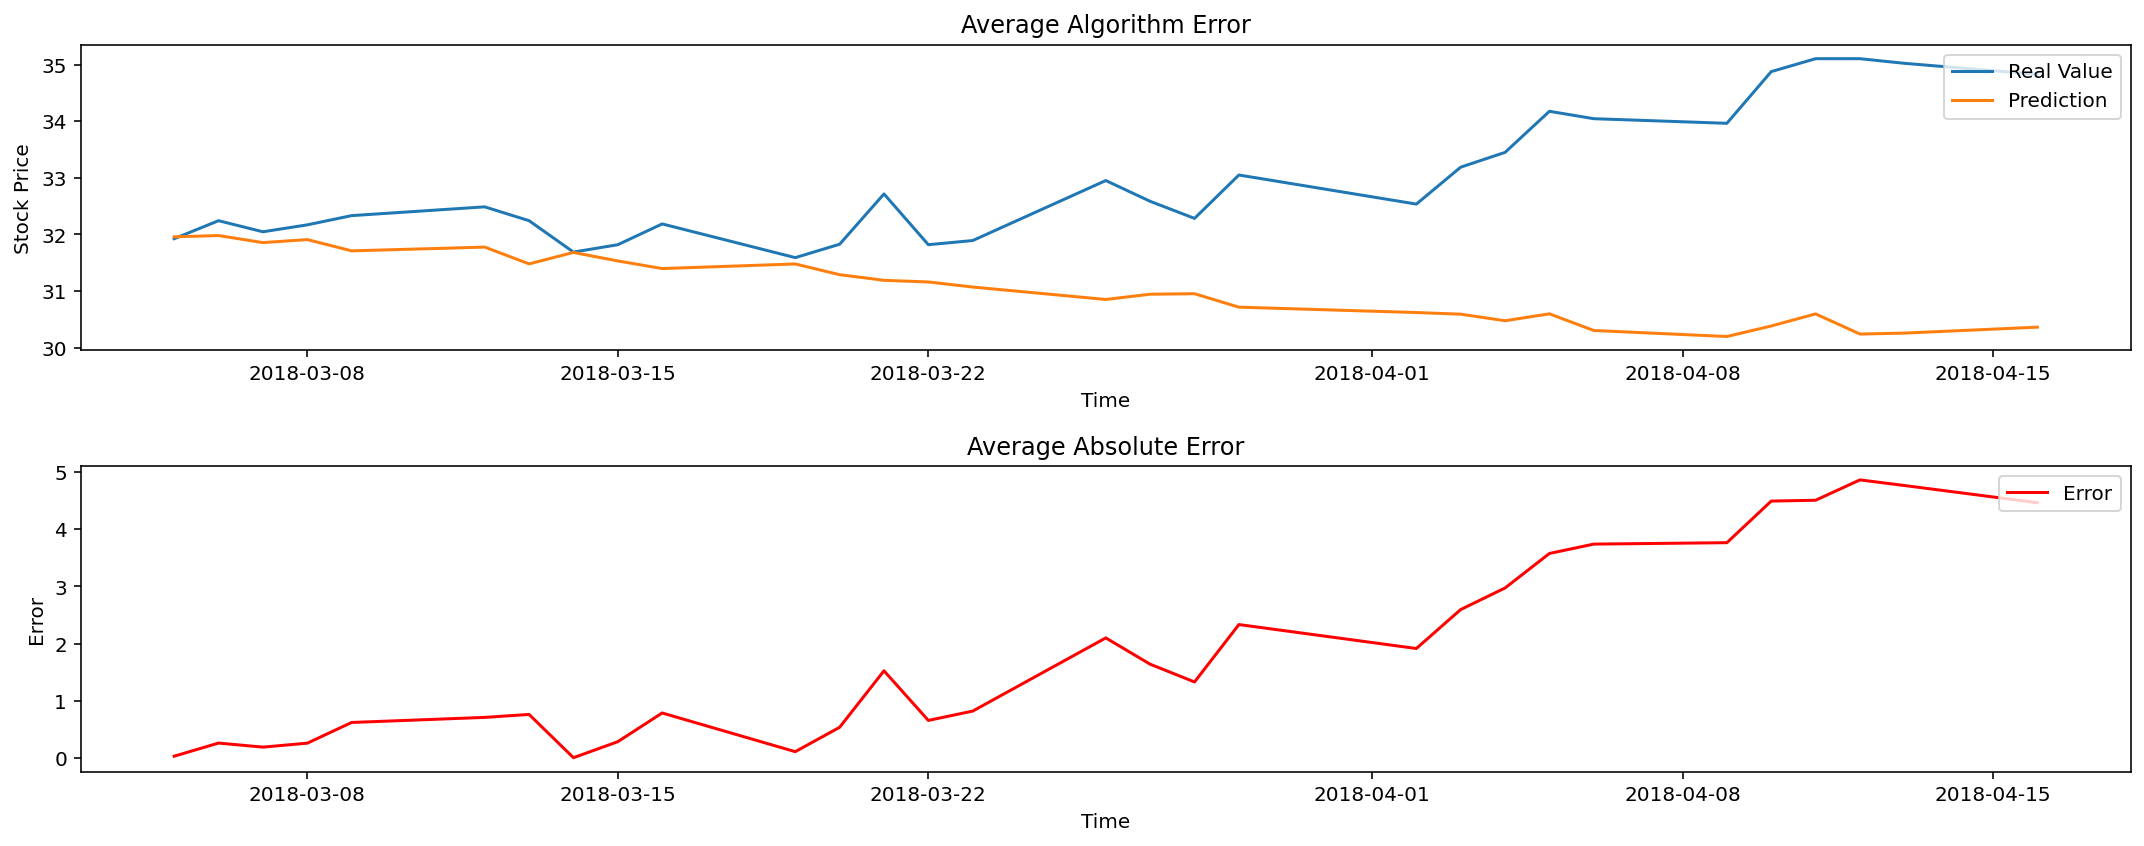

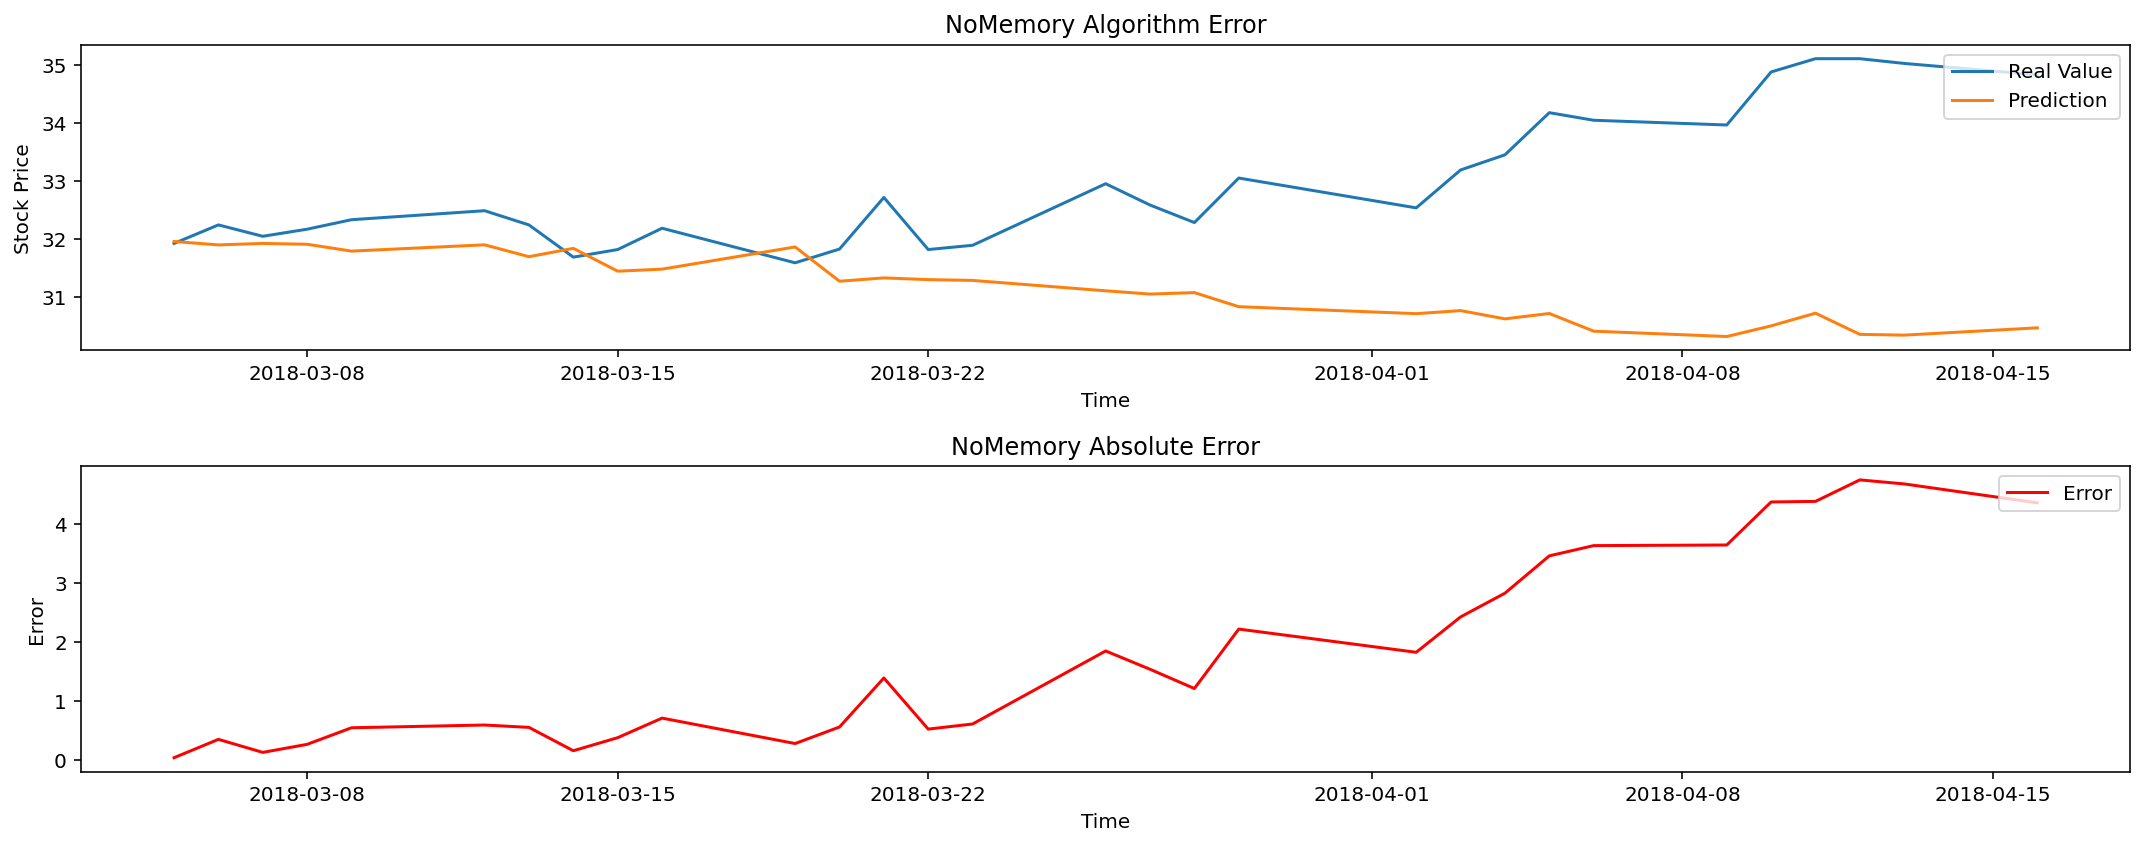

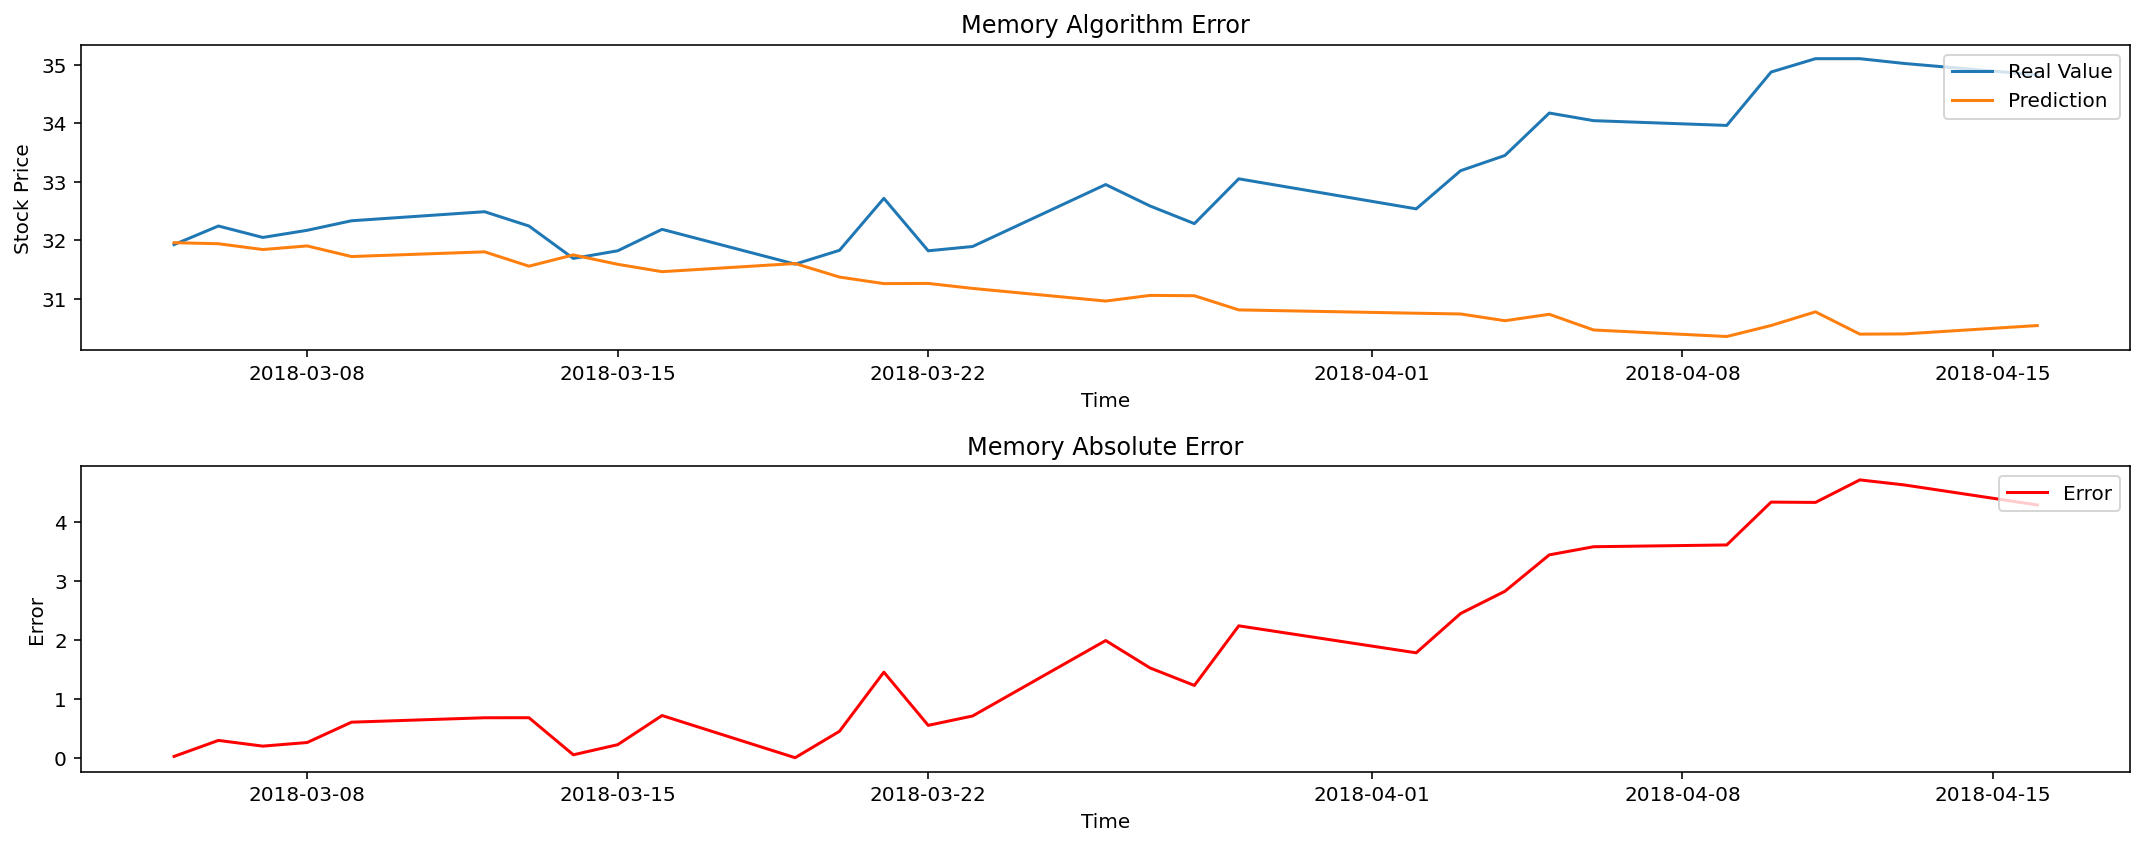

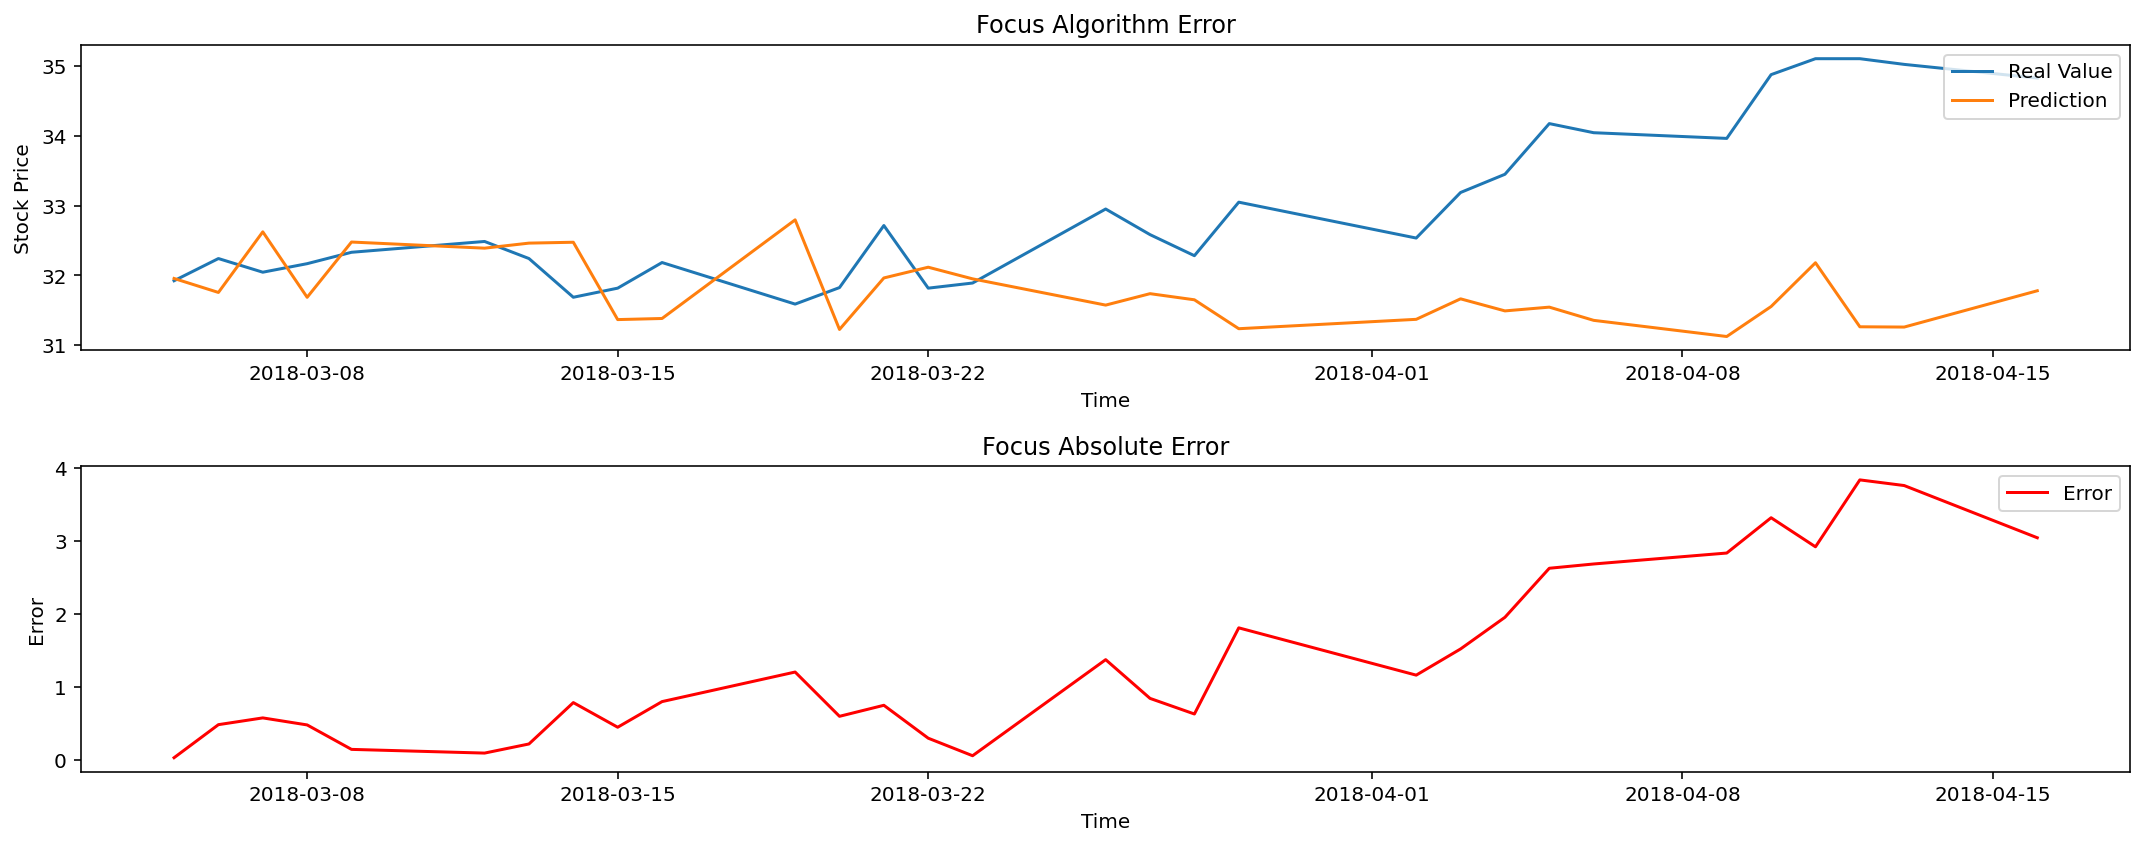

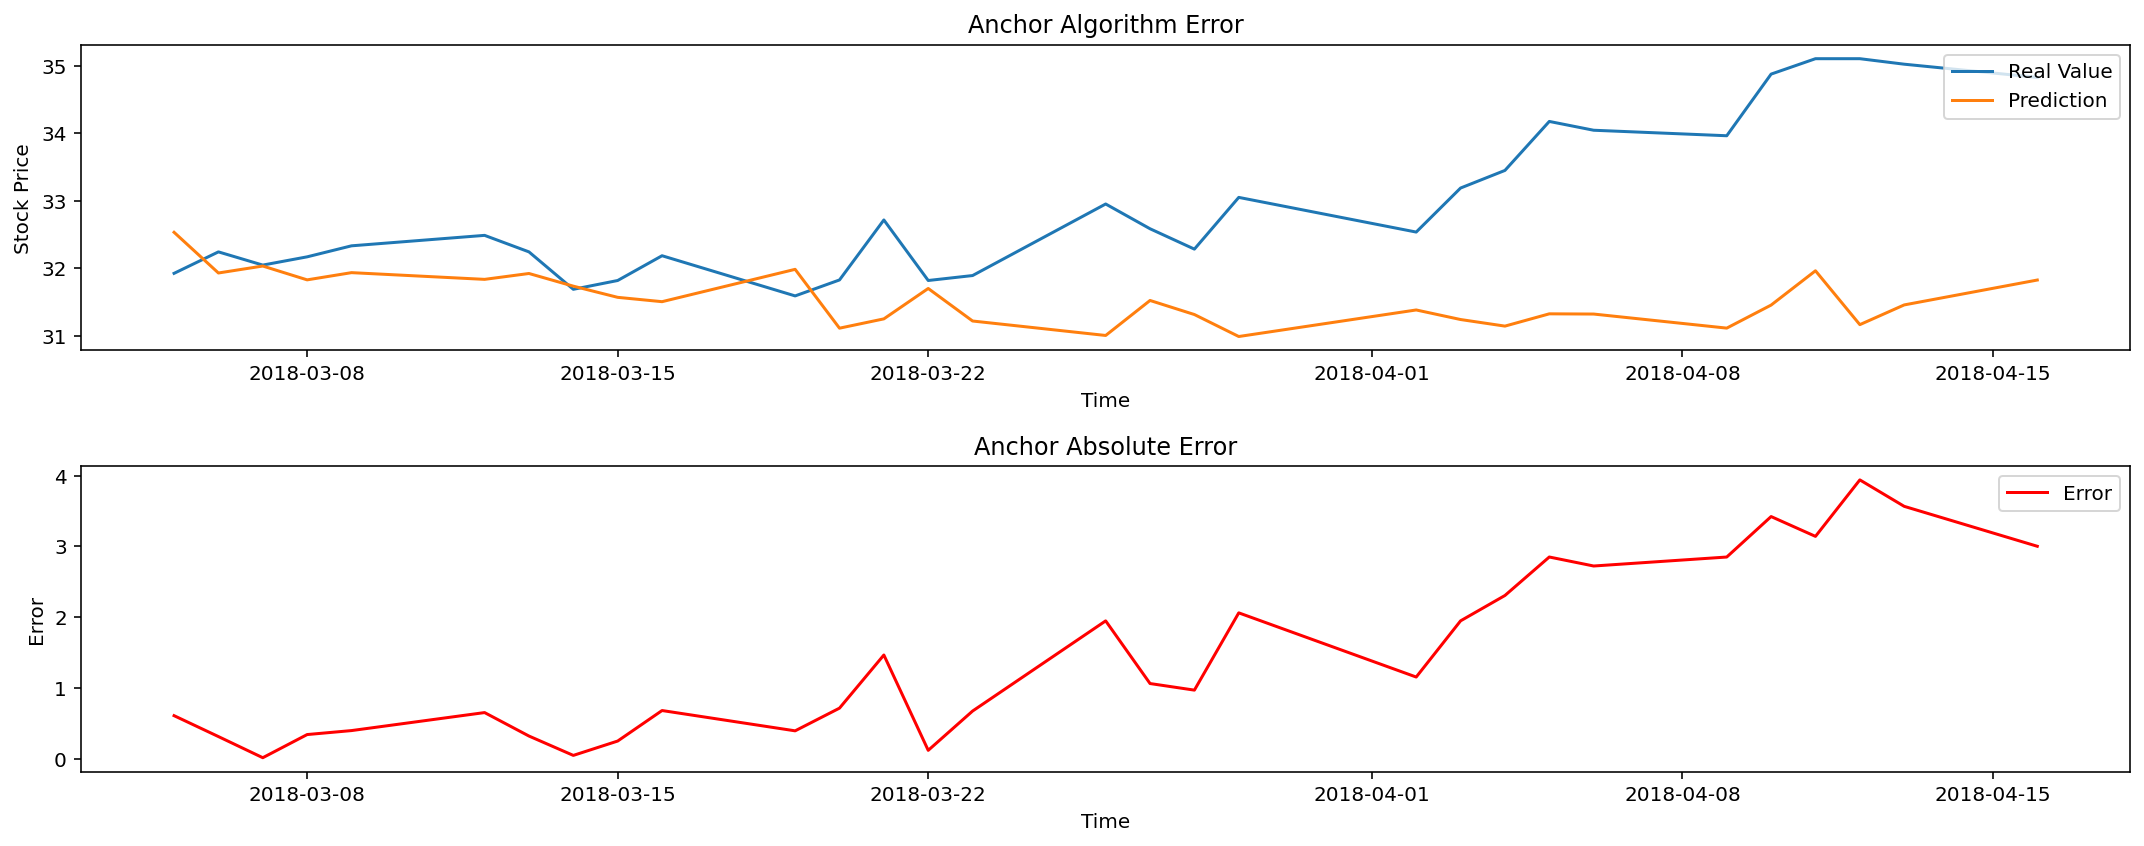

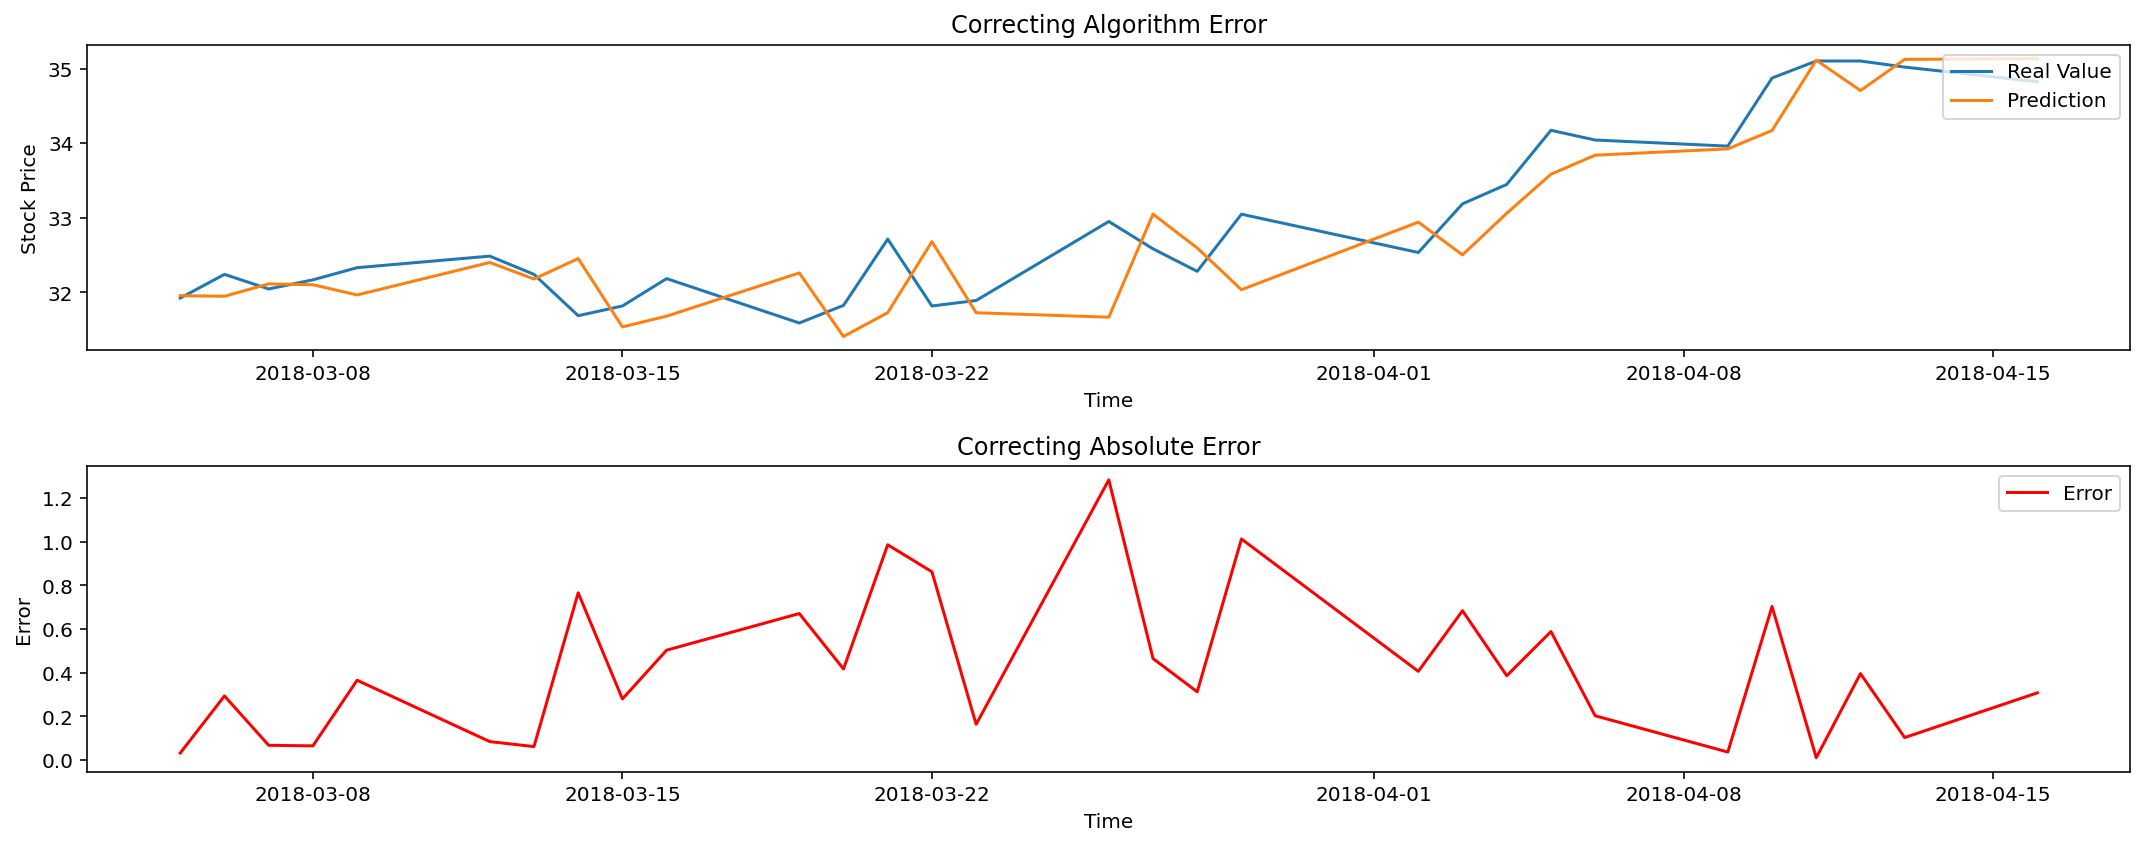

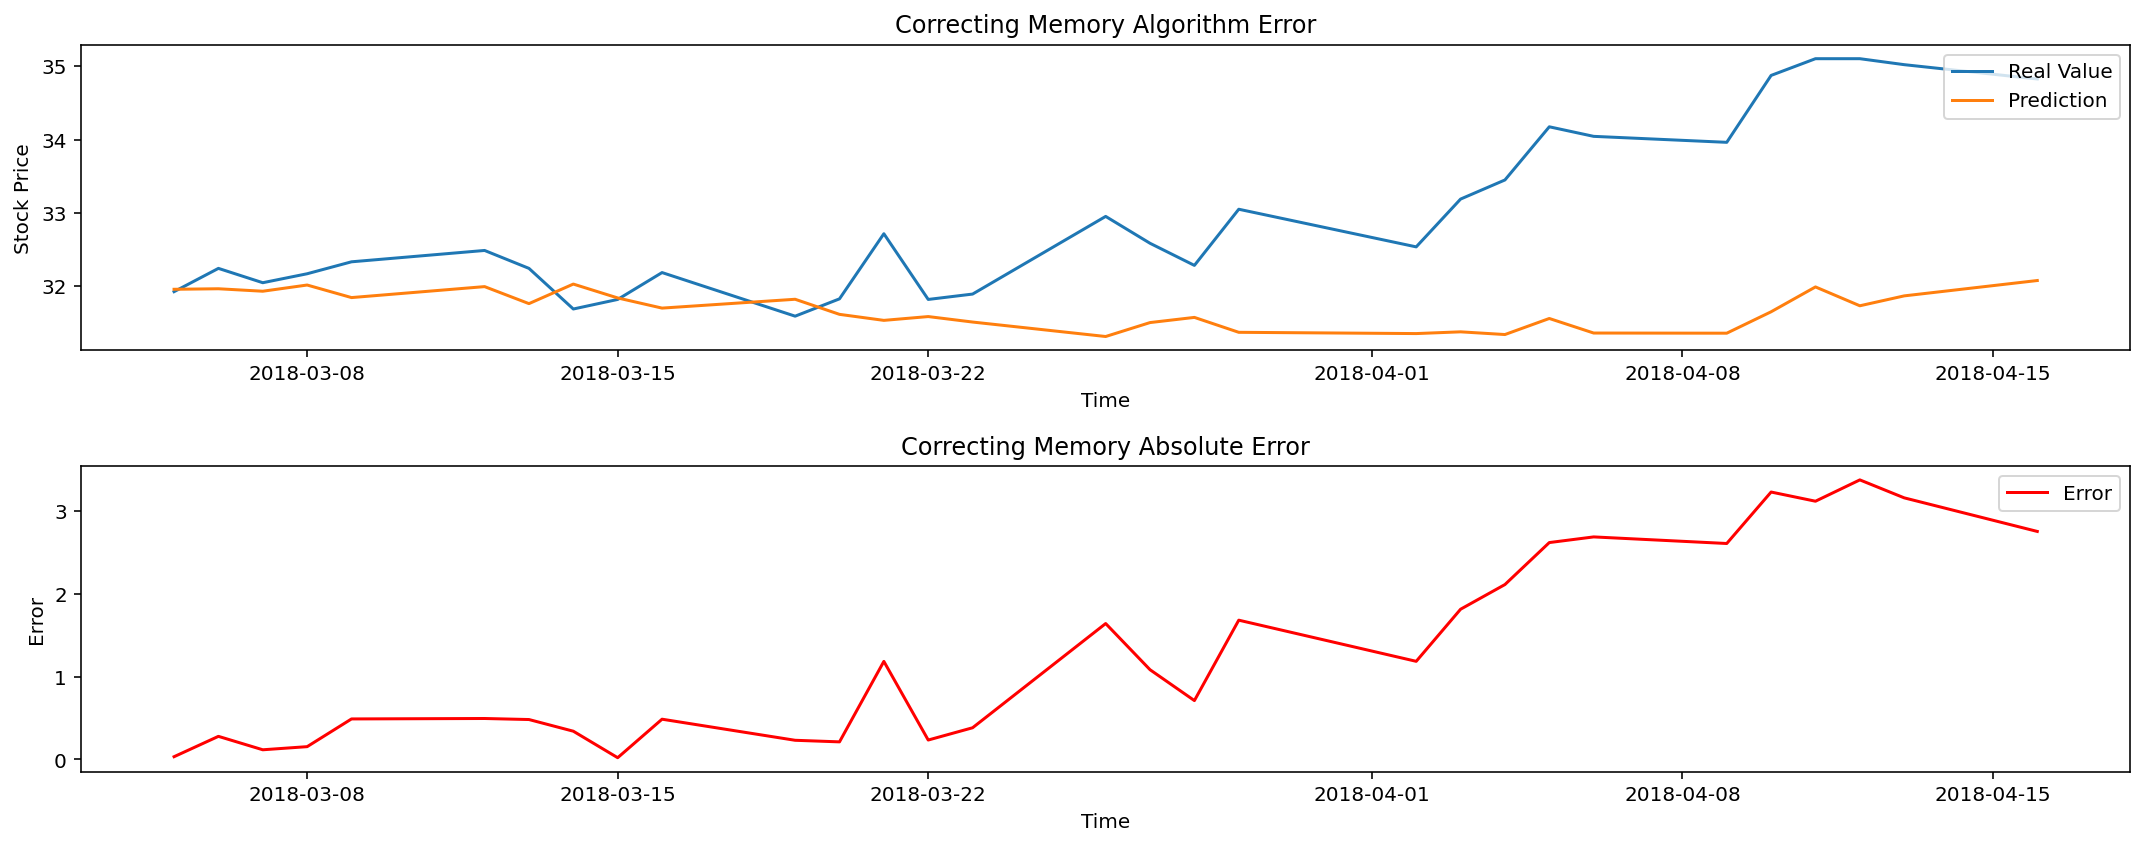

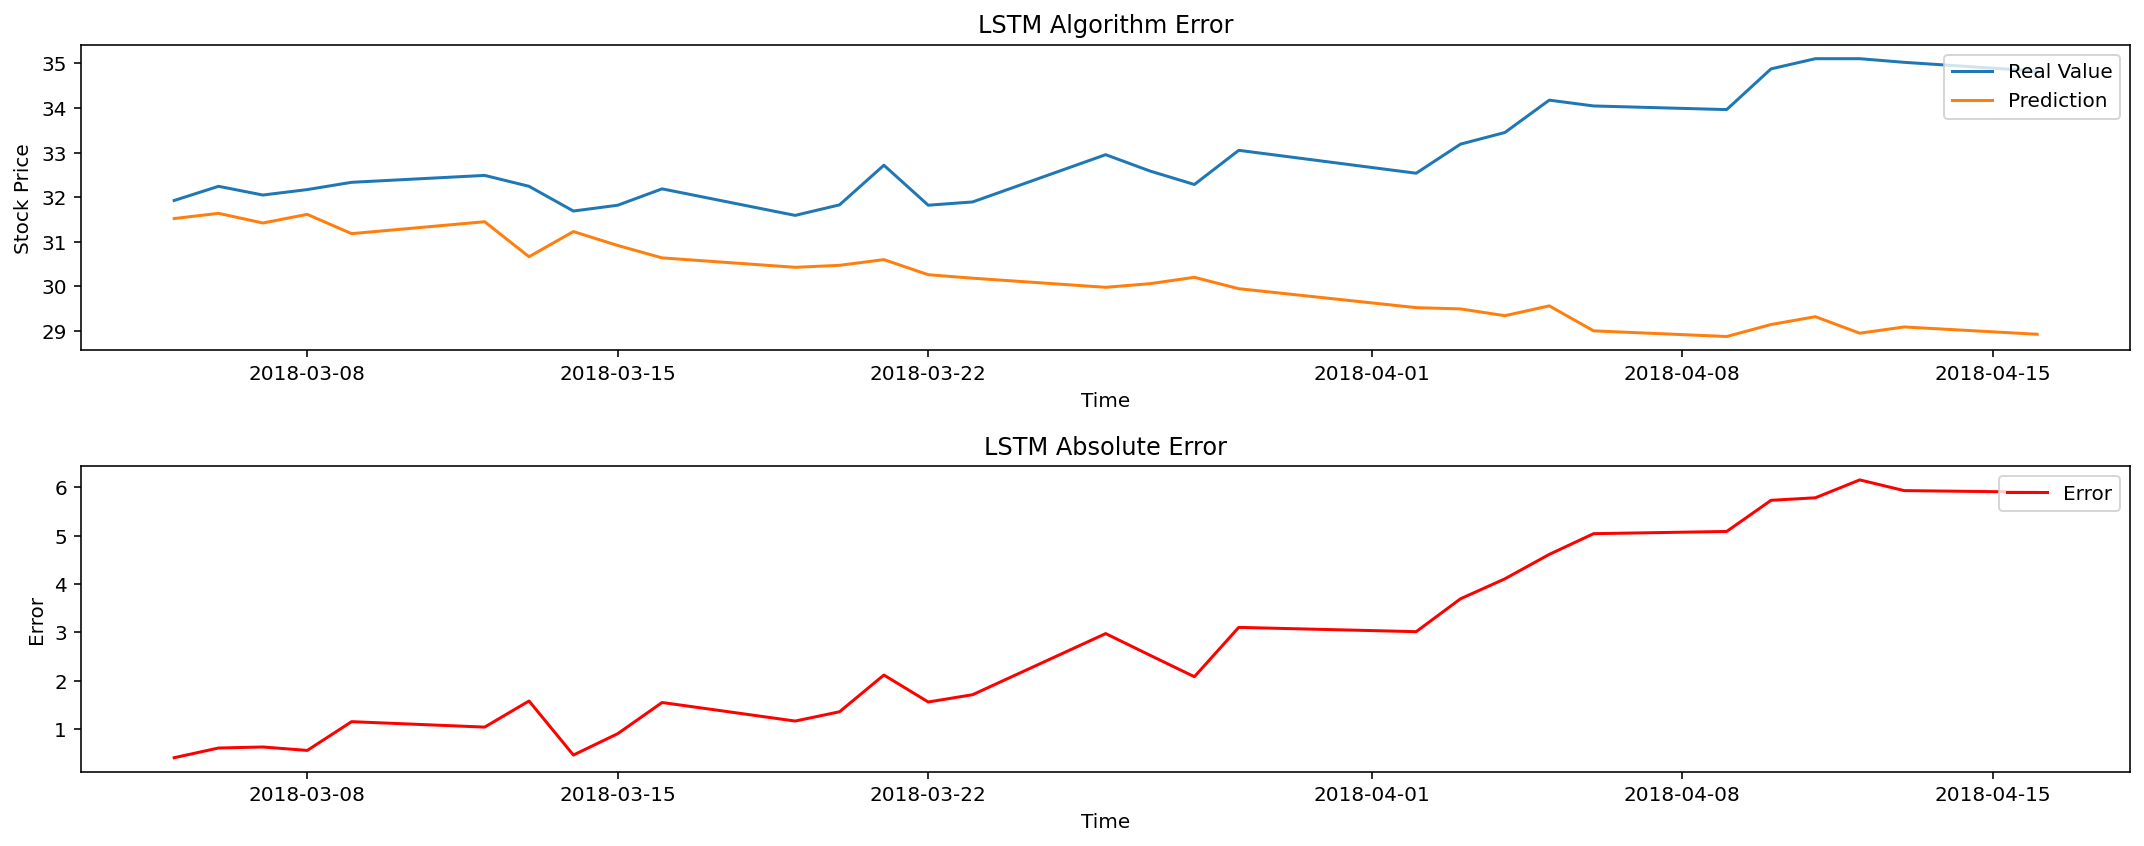

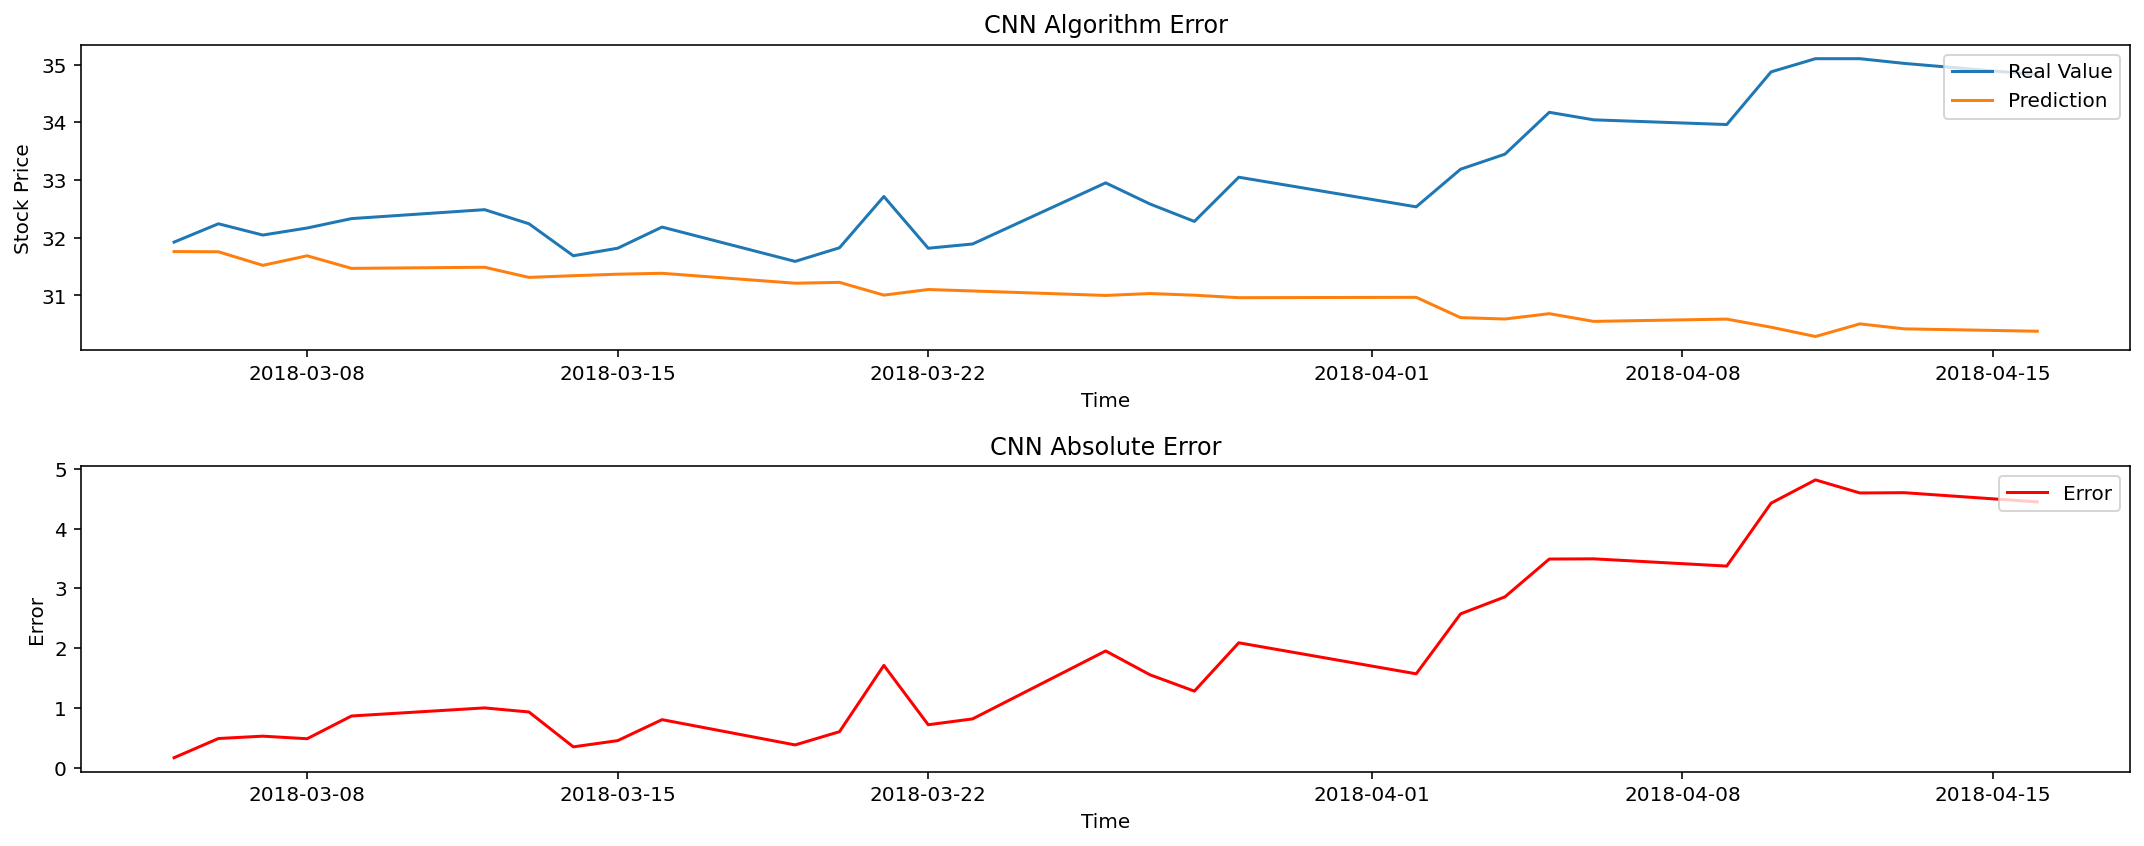

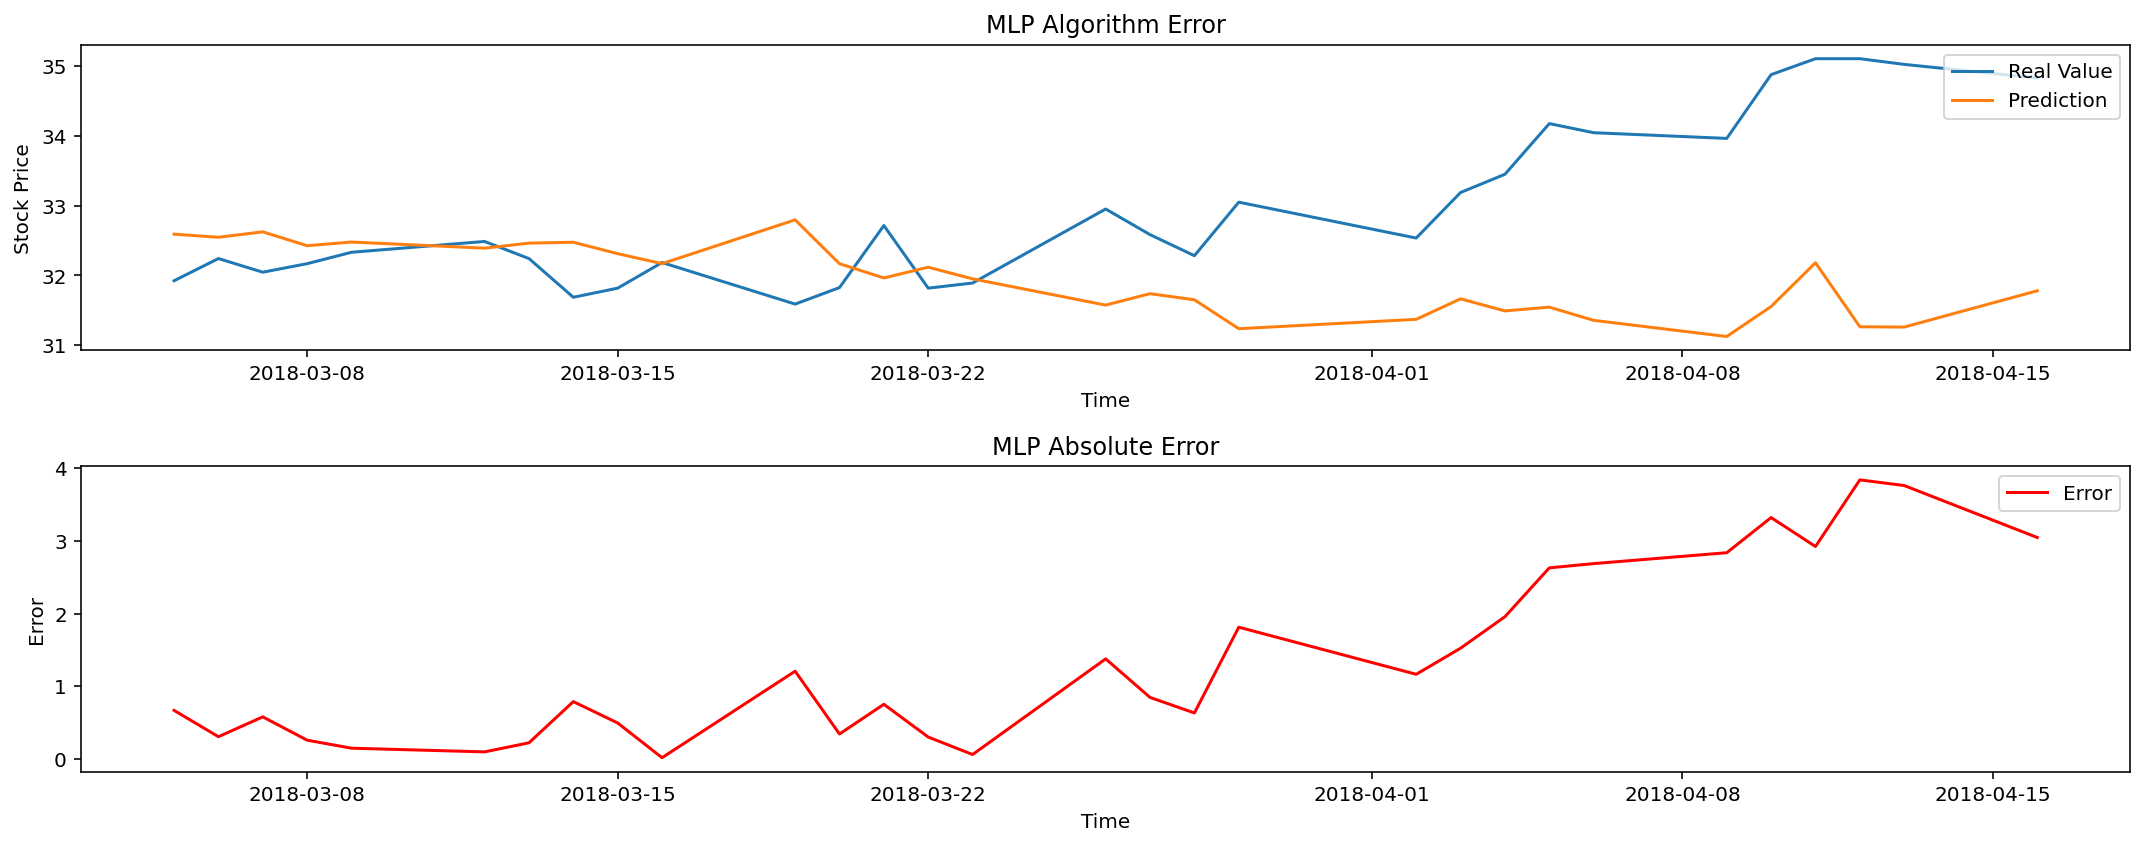

In [16]:
plot_performance(all_forecasts)